In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# SVM

In [ ]:
import matplotlib.image as mimg
import numpy as np
import matplotlib.pyplot as plt
total_samples = 410
data = np.zeros((total_samples,112*92))
label = np.zeros((total_samples))
images = np.zeros((total_samples,112,92))

index = -1
for i in range(1,42,1):
  for j in range(1,11,1):
    user_id = i
    samp_no = j
    index = index + 1
    path = "/content/drive/MyDrive/Colab Notebooks/Face/orl_face/u%d/%d.png"%(user_id, samp_no)

    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[index,:] = feat
    label[index] = i
    images[index,:,:] = im

print(images.shape)

(410, 112, 92)


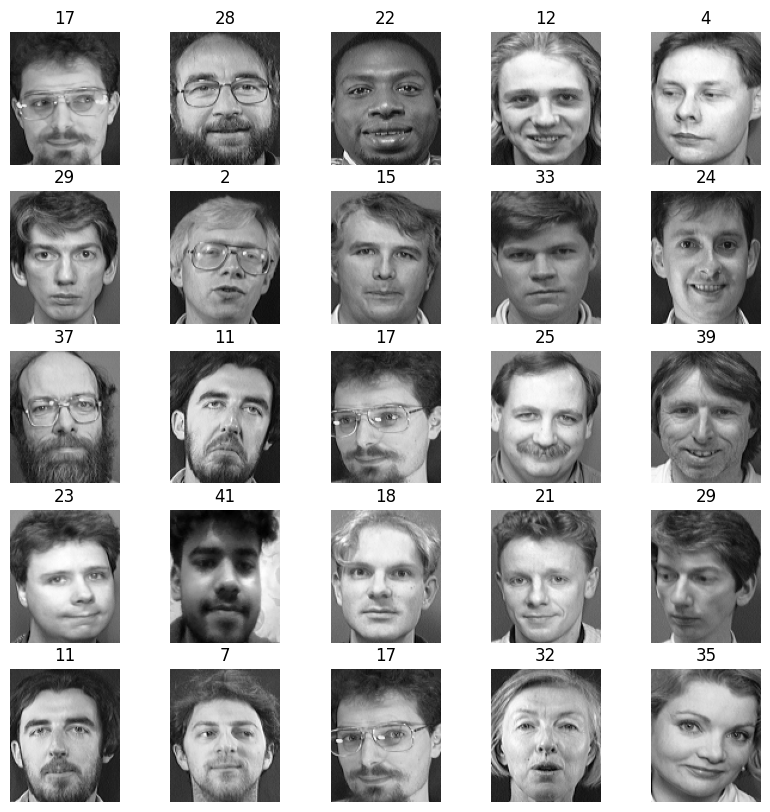

In [ ]:
import numpy as np
# visualise the data images
plt.figure(1,(10,10))
for i in range(5):
  for j in range(5):
    num = np.random.randint(0,410)
    samples_im = images[num,:,:]
    plt.subplot(5,5,(i+j*5)+1)
    plt.imshow(samples_im,cmap='gray')
    plt.title(str(int(label[num])))
    plt.axis('off')

In [ ]:
from sklearn import svm,model_selection,metrics
import numpy as np

x = data
y = label

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=4)

img_model = svm.SVC(kernel="linear", gamma="scale",C=1)
img_model = img_model.fit(xtrain,ytrain)
ypred = img_model.predict(xtest)

accSVM = metrics.accuracy_score(ypred,ytest)
print("Accuracy of SVM Model is:", accSVM)

Accuracy of SVM Model is: 0.983739837398374


# Neural Network

0.22352941


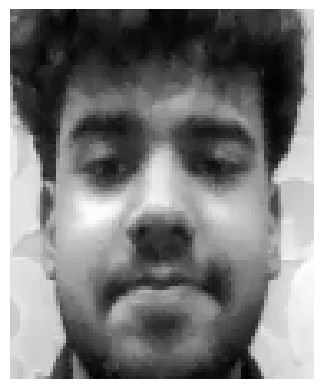

In [ ]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
path = '/content/drive/MyDrive/Colab Notebooks/Face/orl_face/u41/1.png'
im = mimg.imread(path)
print(im[0,10])
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
data = np.zeros((410,112,92))
label = np.zeros(410)
print(data.shape)
count = 0
for i in range(1,42):
  for j in range(1,11):
    path = '/content/drive/MyDrive/Colab Notebooks/Face/orl_face/u%d/%d.png'%(i,j)
    im = mimg.imread(path)
    data[count,:,:] = im
    label[count] = i
    count+=1

print(data.shape,label.shape)

(410, 112, 92)
(410, 112, 92) (410,)


In [ ]:
from sklearn import model_selection
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(data,label,test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

face_model = keras.Sequential()
#input layer
face_model.add(keras.layers.Flatten(input_shape=(xtrain.shape[1],xtrain.shape[2])))

#hidden layers
face_model.add(keras.layers.Dense(128,activation='relu'))
face_model.add(keras.layers.Dense(256,activation='relu'))
face_model.add(keras.layers.Dense(256,activation='relu'))
face_model.add(keras.layers.Dense(512,activation='relu'))

#output layer
face_model.add(keras.layers.Dense(410,activation='relu'))

#add optimizer
face_model.compile(optimizer="SGD", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print(face_model.summary())

(287, 112, 92) (287,)
(123, 112, 92) (123,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10304)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1319040   
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dense_8 (Dense)             (None, 410)               210330    
                                                                 
Total para

In [ ]:
#train the model
history = face_model.fit(xtrain, ytrain, epochs=150)

Epoch 1/150
9/9 [==============================] - 1s 26ms/step - loss: 5.9936 - accuracy: 0.0000e+00
Epoch 2/150
9/9 [==============================] - 0s 26ms/step - loss: 5.9311 - accuracy: 0.0000e+00
Epoch 3/150
9/9 [==============================] - 0s 25ms/step - loss: 5.8281 - accuracy: 0.0244
Epoch 4/150
9/9 [==============================] - 0s 26ms/step - loss: 5.6141 - accuracy: 0.0244
Epoch 5/150
9/9 [==============================] - 0s 31ms/step - loss: 5.2519 - accuracy: 0.0209
Epoch 6/150
9/9 [==============================] - 0s 25ms/step - loss: 4.9556 - accuracy: 0.0383
Epoch 7/150
9/9 [==============================] - 0s 26ms/step - loss: 4.8286 - accuracy: 0.0244
Epoch 8/150
9/9 [==============================] - 0s 23ms/step - loss: 4.7855 - accuracy: 0.0244
Epoch 9/150
9/9 [==============================] - 0s 28ms/step - loss: 4.7493 - accuracy: 0.0383
Epoch 10/150
9/9 [==============================] - 0s 25ms/step - loss: 4.7042 - accuracy: 0.0488
Epoch 11/15

In [ ]:
#evaluate the test data

[loss, accNN] = face_model.evaluate(xtest, ytest)
print(f"Testing Accuracy of Neural Network (NN) is: {accNN}")

4/4 [==============================] - 0s 8ms/step - loss: 0.9032 - accuracy: 0.7967
Testing Accuracy of Neural Network (NN) is: 0.7967479825019836


# CNN

In [ ]:
# create the CNN model
cnn_model = keras.models.Sequential() # empty framework
# Convolutinal layer 1
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(112,92,1)))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(112,92,1)))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(112,92,1)))
# maxpooling -1
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# Convolutinal layer 2
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu'))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu'))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu'))
# maxpooling -2
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# feed forwards network
cnn_model.add(keras.layers.Flatten()) # input layer
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL1
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL2
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL3
cnn_model.add(keras.layers.Dense(410)) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss = loss,metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 110, 90, 64)       640       
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 88, 64)       36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 86, 64)       36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 53, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 51, 41, 64)        36928     
                                                                 
 conv2d_13 (Conv2D)          (None, 49, 39, 64)        36928     
                                                      

In [ ]:
# train the cnn along with the validation data
history = cnn_model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest));

Epoch 1/20
9/9 [==============================] - 51s 6s/step - loss: 6.0146 - accuracy: 0.0000e+00 - val_loss: 6.0122 - val_accuracy: 0.0000e+00
Epoch 2/20
9/9 [==============================] - 51s 6s/step - loss: 6.0106 - accuracy: 0.0174 - val_loss: 6.0087 - val_accuracy: 0.0163
Epoch 3/20
9/9 [==============================] - 50s 6s/step - loss: 6.0067 - accuracy: 0.0279 - val_loss: 6.0051 - val_accuracy: 0.0163
Epoch 4/20
9/9 [==============================] - 56s 6s/step - loss: 6.0025 - accuracy: 0.0279 - val_loss: 6.0013 - val_accuracy: 0.0163
Epoch 5/20
9/9 [==============================] - 51s 6s/step - loss: 5.9981 - accuracy: 0.0279 - val_loss: 5.9970 - val_accuracy: 0.0163
Epoch 6/20
9/9 [==============================] - 50s 6s/step - loss: 5.9932 - accuracy: 0.0279 - val_loss: 5.9923 - val_accuracy: 0.0163
Epoch 7/20
7/9 [======================>.......] - ETA: 10s - loss: 5.9891 - accuracy: 0.0223